In [29]:
import numpy as np, os, sys

import matplotlib as mpl #patch-wise similarities, droi images

import matplotlib.pyplot as plt

x.shape (1600, 1) ,y.shape (1600, 1)
x.shape (5000, 1) ,y.shape (5000, 1)


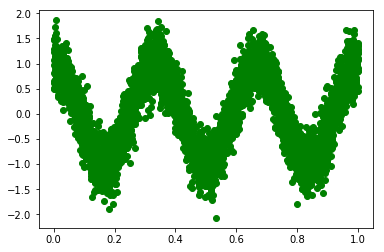

ytr.shape (1600, 1)
xtr (1600, 2) w (2, 1) xv (5000, 2) yv (5000, 1) ypred (5000, 1)
mse 0.5858917597523503
ytr.shape (1600, 1)
w.shape (50, 1)
xtr (1600, 2) w (50, 1) xv (5000, 2) yv (5000, 1) ypred (5000, 1)
mse 29.070952658025828
mse 29.070952658025828


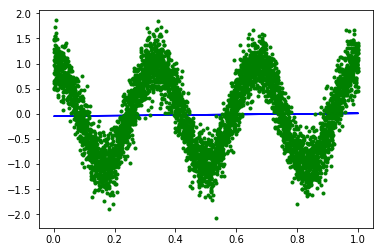

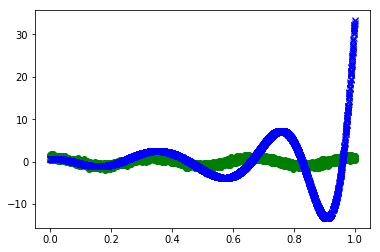

In [41]:
def datagen1d(eps,num):

  x=np.random.uniform(low=0,high=1,size=(num,1))
  y=np.cos(3*2*np.pi*x)+eps*np.random.normal(size=(num,1))

  print("x.shape", x.shape,',y.shape',y.shape)

  #this creates features with an appended 1 for use as a term modeling the bias
  x=np.concatenate((x, np.ones_like(x)),axis=1)

  #x.shape=(numdata,dims) dims=2 here
  #y.shape=(numdata)
  #print(x.shape,y.shape)

  return x,y

def rndsplit(x,y,numtr):

  inds=np.arange(y.size)
  np.random.shuffle(inds)

  xtr=x[inds[0:numtr],:]
  ytr=y[inds[0:numtr]]

  xv=x[inds[numtr:],:]
  yv=y[inds[numtr:]]

  return xtr,ytr,xv,yv

def gendata(numtrain,numtest):
  

  xtr,ytr = datagen1d(eps=0.3,num= int( numtrain) ) #numtotal
  xv,yv = datagen1d(eps=0.3,num= numtest ) #fix 3k test samples
  #xtr,ytr,xv,yv = rndsplit(x,y,numtr=int( 0.7*numtotal))
  return xtr,ytr,xv,yv

def linreg_train(xtr,ytr,C):
  xtrans = np.transpose(xtr)
  w = np.matmul(np.matmul(np.linalg.inv(np.matmul(xtrans,xtr)+C),xtrans),ytr)
  print("ytr.shape", ytr.shape)
  return w

def linreg_apply(xv,w):
  return np.dot(xv,w)

def mse(ypred,ytrue):
  e=np.mean( (ypred-ytrue)**2 )
  return e


def run1(xtr,ytr,xv,yv,C):

  w=linreg_train(xtr,ytr,C=C) # 0.1



  ypred=linreg_apply(xv,w)

  print('xtr',xtr.shape,'w',w.shape,'xv',xv.shape,'yv',yv.shape,'ypred',ypred.shape)

  e=mse(ypred,yv)

  plt.figure(1)
  plt.plot(xv[:,0],ypred,'b-')
  plt.plot(xv[:,0],yv,'g.')
  #plt.show()
  

  #print('mse',e)

  return e


def rbffeats(x,protos,gamma):
  gamma=1/gamma
  return sklearn.metrics.pairwise.rbf_kernel(x, protos, gamma)


def run2(xtr,ytr,xv,yv,C):

  randinds=np.random.choice(np.arange(xtr.shape[0]),size=50,replace=False)
  protos=xtr[randinds,:]
  gamma=0.05

  traindata_nobiasdim=xtr[:,0].reshape((xtr.shape[0],1))
  protos_nobiasdim=protos[:,0].reshape((protos.shape[0],1))

  fttr=rbffeats(traindata_nobiasdim,protos_nobiasdim,gamma)

  w=linreg_train(fttr,ytr,C=C) # 0.1

  print("w.shape", w.shape)

  valdata_nobiasdim=xv[:,0].reshape((xv.shape[0],1))

  ftv=rbffeats(valdata_nobiasdim,protos_nobiasdim,gamma)

  ypred=linreg_apply(ftv,w)

  print('xtr',xtr.shape,'w',w.shape,'xv',xv.shape,'yv',yv.shape,'ypred',ypred.shape)

  e=mse(ypred,yv)

 
  plt.figure(2)
  plt.plot(xv[:,0],yv,'go')
  plt.plot(xv[:,0],ypred,'bx')
  
  

  print('mse',e)

  return e

if __name__=='__main__':

 
  xtr,ytr,xv,yv=gendata(1600,5000)


  plt.figure(3)
  plt.plot(xv[:,0],yv,'go')
  plt.show()

  e=run1(xtr,ytr,xv,yv,1e-3)
  print('mse',e)

  e=run2(xtr,ytr,xv,yv,1e-3)
  print('mse',e)

  plt.show()





[[6 7]
 [4 5]]
